In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)


In [3]:
# Display first few rows
print("Dataset Head:")
display(df.head())


Dataset Head:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Drop the species column (for clustering we don't need labels)
X = df.drop('species', axis=1)


In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Apply PCA for visualization (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [7]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels


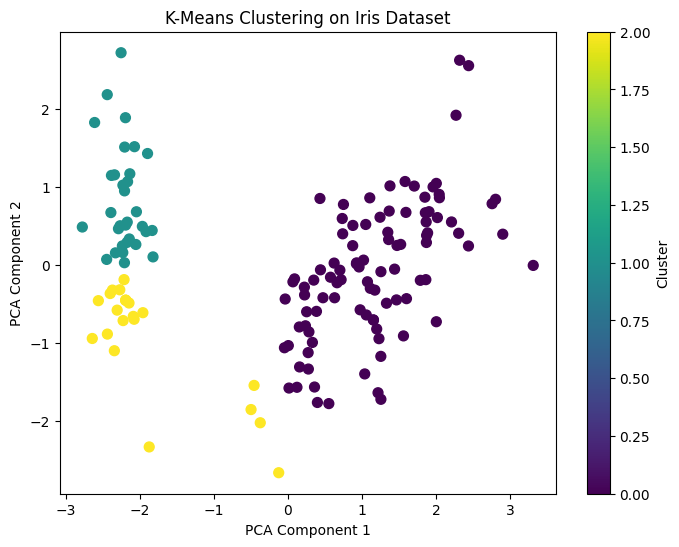

In [8]:
# Visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50)
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [9]:
# Print cluster centers (original scale)
print("\nCluster Centers (original scale):")
print(kmeans.cluster_centers_)



Cluster Centers (original scale):
[[ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]
 [-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]]
